In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import sklearn as sk

In [2]:
# from user side

# location
# severity : low, medium , high
# capacity-need : small, medium , large
# service-need : food and water, shelter , evacuation , medical , fire , workforce , protection
# specialization-need : medical , water rescue , search and rescue , fire responce ,  evacuation , earthquake-responce
# medical-facilities-need : basic , trauma care , surgical facilities ,intensive care units
# supplies and resources : low , high


In [3]:
# from rescue team side
# location
# severity : low , medium , high
# capacity : small, medium , large
# services : food and water, shelter , evacuation , medical , fire , workforce , protection
# availability : available , full , temprarily unavailable
# specialization : medical , water rescue , search and rescue , fire responce , evacuation ,earthquake-responce
# medical facilities : basic , trauma care , surgical facilities ,intensive care units
# supplies and resources : well-stocked , limited supplies 

In [4]:
from random import choices , choice , randint , uniform, sample

In [5]:
sample([1,2,3,4,5,6],k=randint(1,6))

[6, 4]

In [6]:
severity=['low','medium','high']
capacity=['small','medium','high']
services=['food and water','shelter','evacuation','medical','fire','workforce','protection']
availability=['available','full','temprarily unavailable']
specialization=['medical','water rescue' , 'search and rescue' , 'fire responce' , 'evacuation' ,'earthquake-responce']
medical_facility=['basic' , 'trauma care' , 'surgical facilities' ,'intensive care units']
supply_and_resource=['well-stocked' , 'limited supplies']

In [7]:
severity = ["low", "medium", "high"]
capacity = ["small", "medium", "large"]
services = ["medical care", "food and water", "transportation", "language assistance", "counseling"]
availability = ["available", "almost full", "full", "temporarily unavailable"]
specialization = ["medical", "water rescue", "search and rescue", "fire response", "mental health support"]
medical_facility = ["basic first aid", "trauma care", "surgical facilities", "intensive care units", "pediatric care"]
supply_and_resource = ["well-stocked", "limited supplies", "medical equipment available", "pharmaceuticals available"]
calamities = ["earthquake", "flood", "fire", "hurricane", "tsunami", "pandemic"]


In [8]:
def generate(severity, capacity, services, availability, specialization, medical_facility, supply_and_resource, calamities):
    loc = {"lat": uniform(6, 36), "long": uniform(68, 98)}
    sev = sample(severity, k=1)
    cap = sample(capacity, k=1)
    serv = sample(services, k=randint(1, len(services)))
    avail = sample(availability, k=1)
    special = sample(specialization, k=randint(1, len(specialization)))
    med = sample(medical_facility, k=randint(1, len(medical_facility)))
    resource = sample(supply_and_resource, k=1)
    calamity_needs = sample(calamities, k=randint(1, len(calamities)))
    
    return loc, sev, cap, serv, avail, special, med, resource, calamity_needs


In [9]:

data = [generate(severity, capacity, services, availability, specialization, medical_facility, supply_and_resource, calamities) for _ in range(100)]
columns = ["Location", "Severity", "Capacity", "Services", "Availability", "Specialization", "Medical Facility", "Supply and Resource","calamities"]
df = pd.DataFrame(data, columns=columns)


In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer
one_hot_encoder=MultiLabelBinarizer()

In [12]:
df_one_hot=df.copy()

In [13]:
classes=[]

In [14]:
for column in columns[1:]:
    label_arr=df[column].tolist()
    one_hot_encoder=MultiLabelBinarizer()
    one_hot=one_hot_encoder.fit_transform(label_arr)
    classes.append(one_hot_encoder.classes_)
    
    ll=[list(i) for i in one_hot_encoder.inverse_transform(one_hot)]
    
    df[column]=ll
    df_one_hot[column]=one_hot.tolist()
    

In [15]:
severity = classes[0]
capacity = classes[1]
services = classes[2]
availability = classes[3]
specialization = classes[4]
medical_facility = classes[5]
supply_and_resource = classes[6]
calamities = classes[7]


In [16]:
df_one_hot

,Location,Severity,Capacity,Services,Availability,Specialization,Medical Facility,Supply and Resource,calamities
0,"{'lat': 9.736469432403734, 'long': 81.96167343...","[0, 1, 0]","[0, 0, 1]","[0, 1, 1, 1, 0]","[0, 1, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 0, 1, 0]","[0, 1, 0, 0]","[1, 0, 0, 1, 1, 1]"
1,"{'lat': 24.7317574303097, 'long': 70.063284321...","[0, 0, 1]","[0, 0, 1]","[0, 1, 0, 0, 0]","[0, 1, 0, 0]","[1, 1, 1, 1, 1]","[0, 1, 0, 0, 0]","[0, 0, 1, 0]","[1, 0, 1, 0, 1, 1]"
2,"{'lat': 27.882317000137803, 'long': 86.6591534...","[0, 1, 0]","[0, 0, 1]","[0, 1, 0, 1, 1]","[1, 0, 0, 0]","[1, 1, 1, 1, 1]","[0, 1, 0, 1, 0]","[0, 0, 1, 0]","[1, 0, 1, 0, 0, 0]"
3,"{'lat': 23.369818512166894, 'long': 94.1749278...","[0, 1, 0]","[0, 1, 0]","[1, 1, 1, 1, 1]","[1, 0, 0, 0]","[1, 0, 1, 1, 1]","[1, 1, 1, 1, 1]","[0, 0, 0, 1]","[1, 1, 0, 0, 1, 1]"
4,"{'lat': 24.192323691853876, 'long': 86.4885913...","[1, 0, 0]","[1, 0, 0]","[1, 1, 0, 1, 1]","[0, 0, 1, 0]","[1, 1, 1, 1, 1]","[1, 1, 1, 1, 0]","[1, 0, 0, 0]","[1, 1, 1, 0, 1, 1]"
...,...,...,...,...,...,...,...,...,...
95,"{'lat': 6.084204414853288, 'long': 81.78673479...","[0, 1, 0]","[0, 0, 1]","[0, 0, 1, 0, 0]","[1, 0, 0, 0]","[1, 0, 1, 0, 0]","[0, 1, 1, 1, 1]","[0, 0, 0, 1]","[1, 0, 0, 0, 0, 1]"
96,"{'lat': 15.414160779758326, 'long': 85.5456370...","[1, 0, 0]","[0, 1, 0]","[1, 1, 0, 1, 0]","[0, 0, 0, 1]","[1, 0, 0, 1, 0]","[1, 1, 1, 1, 1]","[0, 0, 1, 0]","[1, 1, 1, 1, 1, 1]"
97,"{'lat': 8.314710190576328, 'long': 95.43413247...","[0, 1, 0]","[0, 0, 1]","[1, 1, 1, 1, 0]","[0, 0, 0, 1]","[0, 1, 0, 1, 0]","[0, 0, 0, 1, 1]","[0, 0, 1, 0]","[1, 1, 1, 1, 1, 1]"
98,"{'lat': 19.70285331992752, 'long': 91.41626550...","[0, 0, 1]","[0, 0, 1]","[1, 1, 0, 1, 1]","[0, 0, 1, 0]","[1, 1, 1, 1, 1]","[1, 1, 1, 1, 0]","[0, 0, 1, 0]","[1, 0, 1, 0, 1, 0]"


In [17]:
df

,Location,Severity,Capacity,Services,Availability,Specialization,Medical Facility,Supply and Resource,calamities
0,"{'lat': 9.736469432403734, 'long': 81.96167343...",[low],[small],"[food and water, language assistance, medical ...",[available],[mental health support],[surgical facilities],[medical equipment available],"[earthquake, hurricane, pandemic, tsunami]"
1,"{'lat': 24.7317574303097, 'long': 70.063284321...",[medium],[small],[food and water],[available],"[fire response, medical, mental health support...",[intensive care units],[pharmaceuticals available],"[earthquake, flood, pandemic, tsunami]"
2,"{'lat': 27.882317000137803, 'long': 86.6591534...",[low],[small],"[food and water, medical care, transportation]",[almost full],"[fire response, medical, mental health support...","[intensive care units, surgical facilities]",[pharmaceuticals available],"[earthquake, flood]"
3,"{'lat': 23.369818512166894, 'long': 94.1749278...",[low],[medium],"[counseling, food and water, language assistan...",[almost full],"[fire response, mental health support, search ...","[basic first aid, intensive care units, pediat...",[well-stocked],"[earthquake, fire, pandemic, tsunami]"
4,"{'lat': 24.192323691853876, 'long': 86.4885913...",[high],[large],"[counseling, food and water, medical care, tra...",[full],"[fire response, medical, mental health support...","[basic first aid, intensive care units, pediat...",[limited supplies],"[earthquake, fire, flood, pandemic, tsunami]"
...,...,...,...,...,...,...,...,...,...
95,"{'lat': 6.084204414853288, 'long': 81.78673479...",[low],[small],[language assistance],[almost full],"[fire response, mental health support]","[intensive care units, pediatric care, surgica...",[well-stocked],"[earthquake, tsunami]"
96,"{'lat': 15.414160779758326, 'long': 85.5456370...",[high],[medium],"[counseling, food and water, medical care]",[temporarily unavailable],"[fire response, search and rescue]","[basic first aid, intensive care units, pediat...",[pharmaceuticals available],"[earthquake, fire, flood, hurricane, pandemic,..."
97,"{'lat': 8.314710190576328, 'long': 95.43413247...",[low],[small],"[counseling, food and water, language assistan...",[temporarily unavailable],"[medical, search and rescue]","[surgical facilities, trauma care]",[pharmaceuticals available],"[earthquake, fire, flood, hurricane, pandemic,..."
98,"{'lat': 19.70285331992752, 'long': 91.41626550...",[medium],[small],"[counseling, food and water, medical care, tra...",[full],"[fire response, medical, mental health support...","[basic first aid, intensive care units, pediat...",[pharmaceuticals available],"[earthquake, flood, pandemic]"


In [18]:
from scipy.spatial.distance import cosine
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
def similarity(user,rescue):
    point1=np.array([user['Location']['lat'],user['Location']['long']])
    point2=np.array([rescue['Location']['lat'],rescue['Location']['long']])
    dist=np.linalg.norm(point1 - point2)
    cos_dist=cosine(user['Location']['lat'],rescue['Location']['lat'])
    cos_dist+=cosine(user['Location']['long'],rescue['Location']['long'])
    sev=cosine(user['Severity'],rescue['Severity'])
    cap=cosine(user['Capacity'],rescue['Capacity'])
    serv=cosine(user['Service'],rescue['Services'])
    spec=cosine(user['Specialization'],rescue['Specialization'])
    med=cosine(user['Medical Facility'],rescue['Medical Facility'])
    suppy_and_rescource=cosine(user['Supply and Resource'],rescue['Supply and Resource'])
    cal=cosine(user['calamities'],rescue['calamities'])
    
    dist=dist/100
    
    similarities = np.array([0.9*dist,0.8*sev,0.5*cap,0.3*serv,0.5*spec,0.2*med,0.2*suppy_and_rescource, 0.4*cal])
    return dist ,similarities 
    

In [50]:
def encoder(values,labels):
    l=np.zeros(len(labels))
    for i in range(len(labels)):
        if labels[i]  in values:
            l[i]=1
    return l

In [51]:
def process(user):
    user_={
        'Location':user['Location'],
        'Severity': encoder(user['Severity'],severity),
        'Capacity': encoder(user['Capacity'],capacity),
        'Service':encoder(user['Service'],services),
        'Specialization': encoder(user['Specialization'],specialization),
        'Medical Facility':encoder(user['Medical Facility'],medical_facility),
        'Supply and Resource':encoder(user['Supply and Resource'],supply_and_resource),
        'calamities':encoder(user['calamities'],calamities)
    }
    
    return user_

In [52]:
def similarity_search(user,df,df_one_hot,k=3):
    dist=[]
    user_=process(user)
    print("*")
    for i in range(len(df)):
        rescue=df_one_hot.iloc[i].to_dict()
        si=similarity(user_,rescue)
        
        dist.append((i,si[0],si[1],np.sum(si[1])))
        
    dist=np.array(dist)
    dist_id=np.argsort(dist[:,-1])   
    dist=dist[dist_id[:k]]
    
    user_df = pd.DataFrame.from_dict({key: [value] for key, value in user.items()})
    top_k1=[]
    for i in dist_id[:k]:
        top_k1.append(df.iloc[i].to_dict())
    top_k2=[]
    for i in dist_id[:k]:
        top_k2.append(df_one_hot.iloc[i].to_dict())
        
    rescue_df=pd.DataFrame(top_k1)
    rescue_df_one_hot=pd.DataFrame(top_k2)

    
    return dist , user_df ,rescue_df,rescue_df_one_hot

In [53]:
user={
    'Location':{
        'lat':26,
        'long':80
    },
    'Severity': ['high'],
    'Capacity': ['large'],
    'Service':['medical care','food and water'],
    'Specialization': ['medical'],
    'Medical Facility': ['intensive care units'],
    'Supply and Resource':['pharmaceutical available'],
    'calamities': ['pandemic']
}

In [54]:
dist, user_df, rescue_df,rescue_df_one_hot=similarity_search(user,df,df_one_hot)

*


c:\Users\nagas\anaconda3\envs\gpu\lib\site-packages\scipy\spatial\distance.py:630: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
C:\Users\nagas\AppData\Local\Temp\ipykernel_31572\1301299703.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dist=np.array(dist)


In [55]:
user_df

,Location,Severity,Capacity,Service,Specialization,Medical Facility,Supply and Resource,calamities
0,"{'lat': 26, 'long': 80}",[high],[large],"[medical care, food and water]",[medical],[intensive care units],[pharmaceutical available],[pandemic]


In [56]:
rescue_df

,Location,Severity,Capacity,Services,Availability,Specialization,Medical Facility,Supply and Resource,calamities
0,"{'lat': 13.067770669173896, 'long': 80.3870950...",[high],[large],"[medical care, transportation]",[full],[medical],"[basic first aid, intensive care units, pediat...",[pharmaceuticals available],"[fire, flood, hurricane, pandemic]"
1,"{'lat': 16.65867638060273, 'long': 90.52742575...",[high],[large],[food and water],[almost full],"[fire response, medical, mental health support...","[basic first aid, intensive care units, surgic...",[well-stocked],"[earthquake, flood, pandemic]"
2,"{'lat': 21.920317558187218, 'long': 95.1446697...",[high],[large],"[counseling, medical care, transportation]",[temporarily unavailable],"[medical, mental health support]","[intensive care units, pediatric care, surgica...",[limited supplies],"[earthquake, fire, flood, pandemic, tsunami]"


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [58]:
x=[]
y=[]
for i in range(len(df)):
    x.append(df.iloc[i]['Location']['lat'])
    y.append(df.iloc[i]['Location']['long'])

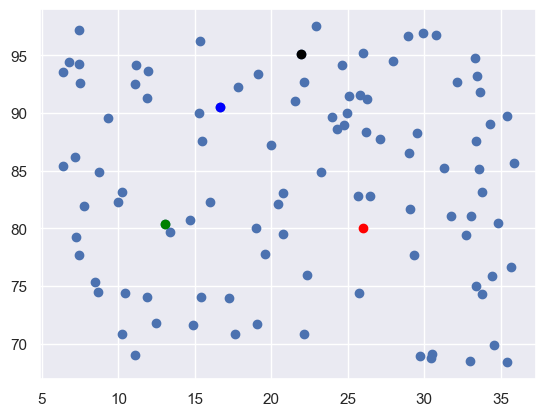

In [59]:
plt.scatter(x,y)
plt.scatter(rescue_df.iloc[0]['Location']['lat'],rescue_df.iloc[0]['Location']['long'],color='green')
plt.scatter(rescue_df.iloc[1]['Location']['lat'],rescue_df.iloc[1]['Location']['long'],color='blue')
plt.scatter(rescue_df.iloc[2]['Location']['lat'],rescue_df.iloc[2]['Location']['long'],color='black')
plt.scatter(user['Location']['lat'],user['Location']['long'],color='red')

In [60]:
scaled_data

NameError: name 'scaled_data' is not defined

In [ ]:
df

,Location,Severity,Capacity,Services,Availability,Specialization,Medical Facility,Supply and Resource,calamities
0,"{'lat': 15.689045265226465, 'long': 80.8366732...",[high],[medium],"[counseling, food and water, language assistan...",[full],[search and rescue],[basic first aid],[medical equipment available],"[fire, flood, hurricane, pandemic, tsunami]"
1,"{'lat': 35.568359414945206, 'long': 88.2603043...",[low],[small],"[counseling, transportation]",[full],"[mental health support, search and rescue]","[intensive care units, trauma care]",[medical equipment available],[flood]
2,"{'lat': 33.33686901546834, 'long': 88.92208565...",[high],[medium],"[counseling, food and water, language assistan...",[available],"[fire response, medical, mental health support...","[basic first aid, intensive care units, surgic...",[well-stocked],"[fire, pandemic]"
3,"{'lat': 24.12239489162407, 'long': 75.87855769...",[low],[medium],"[food and water, language assistance, transpor...",[full],"[fire response, medical, mental health support]","[basic first aid, intensive care units, pediat...",[medical equipment available],"[earthquake, fire, flood, hurricane, pandemic,..."
4,"{'lat': 14.62759577987097, 'long': 74.31083791...",[high],[large],"[counseling, food and water, language assistan...",[temporarily unavailable],"[fire response, mental health support, search ...",[surgical facilities],[limited supplies],[hurricane]
...,...,...,...,...,...,...,...,...,...
95,"{'lat': 14.251272552766727, 'long': 73.6280474...",[low],[large],"[counseling, food and water, language assistan...",[almost full],"[fire response, medical, mental health support...",[trauma care],[pharmaceuticals available],[earthquake]
96,"{'lat': 15.313583176715701, 'long': 73.5162235...",[high],[small],"[counseling, transportation]",[available],"[fire response, medical, mental health support...","[basic first aid, intensive care units, pediat...",[limited supplies],"[earthquake, fire, pandemic]"
97,"{'lat': 28.940915999338785, 'long': 86.1494599...",[low],[medium],"[food and water, language assistance, medical ...",[available],"[fire response, mental health support]","[intensive care units, surgical facilities]",[medical equipment available],"[flood, hurricane, tsunami]"
98,"{'lat': 9.531845331436472, 'long': 92.35960195...",[low],[large],[counseling],[available],"[medical, mental health support, search and re...",[surgical facilities],[well-stocked],[tsunami]


In [ ]:
def preprocess_for_upload(data,top_k=3):
    values=np.zeros((8,8))
    values[0][0]=data['Location']['lat']
    values[0][1]=data['Location']['long']
        
    values=encoder(data['Severity'],classes[0],values,1)
    values=encoder(data['Capacity'],classes[1],values,2)
    values=encoder(data['Service'],classes[2],values,3)
    values=encoder(data['Specialization'],classes[4],values,4)
    values=encoder(data['Medical Facility'],classes[5],values,5)
    values=encoder(data['Supply and Resource'],classes[6],values,6)
    values=encoder(data['calamities'],classes[7],values,7)

    return values
    
def encoder(values,labels,array,j):
    for i in range(len(labels)):
        if labels[i]  in values:
            array[j][i]=1
    return l

In [18]:
import pandas

In [19]:
from pipeline.preprocessing.data_preprocessing import DataPreprocesser

In [20]:
from pipeline.prediction.prediction import Prediction

In [21]:
predictor=Prediction()

In [22]:
all_data=[]
for i in range(len(df)):
    x=df.iloc[i].to_dict()
    x['id']=i
    all_data.append(x)

In [23]:
user={
    'id': 1010,
    'Location':{
        'lat':26,
        'long':80
    },
    'Severity': ['medium'],
    'Capacity': ['large'],
    'Services':['medical care','food and water'],
    'Specialization': ['medical'],
    'Medical Facility': ['intensive care units'],
    'Supply and Resource':['pharmaceutical available'],
    'calamities': ['pandemic']
}

In [24]:
user

{'id': 1010,
 'Location': {'lat': 26, 'long': 80},
 'Severity': ['medium'],
 'Capacity': ['large'],
 'Services': ['medical care', 'food and water'],
 'Specialization': ['medical'],
 'Medical Facility': ['intensive care units'],
 'Supply and Resource': ['pharmaceutical available'],
 'calamities': ['pandemic']}

In [25]:
res=predictor.similarity_search(user,all_data)

d:\pythonprojects\ml-sih\src\pipeline\prediction\prediction.py:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  scores=np.array(scores)


In [26]:
res

array([[74,
        (0.02550297815745417, array([0.02550298, 1.41421356, 0.        , 1.41421356, 1.41421356,
               1.41421356, 1.        , 1.73205081]))                                            ],
       [9,
        (0.03081699710218371, array([0.030817  , 1.41421356, 0.        , 1.73205081, 2.        ,
               1.41421356, 1.        , 1.73205081]))                                            ],
       [31,
        (0.0367280980338841, array([0.0367281 , 1.41421356, 1.41421356, 1.41421356, 2.        ,
               2.        , 1.        , 1.41421356]))                                           ]],
      dtype=object)

In [27]:
user

{'id': 1010,
 'Location': {'lat': 26, 'long': 80},
 'Severity': ['medium'],
 'Capacity': ['large'],
 'Services': ['medical care', 'food and water'],
 'Specialization': ['medical'],
 'Medical Facility': ['intensive care units'],
 'Supply and Resource': ['pharmaceutical available'],
 'calamities': ['pandemic']}

In [28]:
from scipy.spatial.distance import jaccard

In [29]:
jaccard([1,1,1,0,1,1],[1,1,1,0,1,1])

0.0

In [30]:
user

{'id': 1010,
 'Location': {'lat': 26, 'long': 80},
 'Severity': ['medium'],
 'Capacity': ['large'],
 'Services': ['medical care', 'food and water'],
 'Specialization': ['medical'],
 'Medical Facility': ['intensive care units'],
 'Supply and Resource': ['pharmaceutical available'],
 'calamities': ['pandemic']}

In [31]:
for i in range(3):
    print(all_data[res[i][0]])
    print()
    print()

{'Location': {'lat': 23.773436337557452, 'long': 78.75644332413586}, 'Severity': ['low'], 'Capacity': ['large'], 'Services': ['food and water', 'language assistance', 'medical care', 'transportation'], 'Availability': ['available'], 'Specialization': ['medical', 'search and rescue', 'water rescue'], 'Medical Facility': ['trauma care'], 'Supply and Resource': ['well-stocked'], 'calamities': ['earthquake', 'flood'], 'id': 74}


{'Location': {'lat': 25.030878779741435, 'long': 77.07464922369905}, 'Severity': ['low'], 'Capacity': ['large'], 'Services': ['counseling', 'food and water', 'language assistance', 'medical care', 'transportation'], 'Availability': ['almost full'], 'Specialization': ['fire response', 'mental health support', 'search and rescue'], 'Medical Facility': ['basic first aid', 'intensive care units', 'surgical facilities'], 'Supply and Resource': ['well-stocked'], 'calamities': ['flood', 'hurricane'], 'id': 9}


{'Location': {'lat': 25.65133417240856, 'long': 83.656222639

In [30]:
from scipy.spatial.distance import hamming

In [ ]:
predictor.classes

{'Severity': ['high', 'low', 'medium'],
 'Capacity': ['large', 'medium', 'small'],
 'Services': ['counseling',
  'food and water',
  'language assistance',
  'medical care',
  'transportation'],
 'Availability': ['almost full',
  'available',
  'full',
  'temporarily unavailable'],
 'Specialization': ['fire response',
  'medical',
  'mental health support',
  'search and rescue',
  'water rescue'],
 'Medical Facility': ['basic first aid',
  'intensive care units',
  'pediatric care',
  'surgical facilities',
  'trauma care'],
 'Supply and Resource': ['limited supplies',
  'medical equipment available',
  'pharmaceuticals available',
  'well-stocked'],
 'calamities': ['earthquake',
  'fire',
  'flood',
  'hurricane',
  'pandemic',
  'tsunami']}

In [ ]:
classes

[array(['high', 'low', 'medium'], dtype=object),
 array(['large', 'medium', 'small'], dtype=object),
 array(['counseling', 'food and water', 'language assistance',
        'medical care', 'transportation'], dtype=object),
 array(['almost full', 'available', 'full', 'temporarily unavailable'],
       dtype=object),
 array(['fire response', 'medical', 'mental health support',
        'search and rescue', 'water rescue'], dtype=object),
 array(['basic first aid', 'intensive care units', 'pediatric care',
        'surgical facilities', 'trauma care'], dtype=object),
 array(['limited supplies', 'medical equipment available',
        'pharmaceuticals available', 'well-stocked'], dtype=object),
 array(['earthquake', 'fire', 'flood', 'hurricane', 'pandemic', 'tsunami'],
       dtype=object)]

In [ ]:
predictor.classes

{'Severity': ['high', 'low', 'medium'],
 'Capacity': ['large', 'medium', 'small'],
 'Services': ['counseling',
  'food and water',
  'language assistance',
  'medical care',
  'transportation'],
 'Availability': ['almost full',
  'available',
  'full',
  'temporarily unavailable'],
 'Specialization': ['fire response',
  'medical',
  'mental health support',
  'search and rescue',
  'water rescue'],
 'Medical Facility': ['basic first aid',
  'intensive care units',
  'pediatric care',
  'surgical facilities',
  'trauma care'],
 'Supply and Resource': ['limited supplies',
  'medical equipment available',
  'pharmaceuticals available',
  'well-stocked'],
 'calamities': ['earthquake',
  'fire',
  'flood',
  'hurricane',
  'pandemic',
  'tsunami']}